# <center>CSIS4250 - Section 001 - Special Topics in Data Analytics</center>
## <center>Term Project</center>
# <center>Customer churn analysis and prediction for telecom company</center>
### <center> Prepared by: Kateryna Timonina - 300321769</center>

## References

### Datasource
- Kaggle: https://www.kaggle.com/blastchar/telco-customer-churn

### Jupyter, Python and Markdown
- Python documentation: https://docs.python.org/3/
- Markdown Guide: https://www.markdownguide.org
- Jupyter Notebook: https://jupyter.org/documentation

### Libraries
- Pandas documentation: https://pandas.pydata.org/
- Seaborn: https://seaborn.pydata.org/index.html
- Stats Models: https://www.statsmodels.org/stable/index.html
- Matplotlib: https://matplotlib.org/
- SelectKBest: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html
- Mutual Info Classification: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif


# 1. Introduction




### Dataset Description
The dataset has 7043 unique rows. Each row represents a customer, each column contains various customer’s attributes.

The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents

Here are the attributes available in the dataset files:

- customerID: Customer ID
- gender: Whether the customer is a male or a female
- SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
- Partner: Whether the customer has a partner or not (Yes, No)
- Dependents: Whether the customer has dependents or not (Yes, No)
- Tenure: Number of months the customer has stayed with the company
- PhoneService: Whether the customer has a phone service or not (Yes, No)
- MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract: The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges: The amount charged to the customer monthly
- TotalCharges: The total amount charged to the customer
- Churn: Whether the customer churned or not (Yes or No)

# 2.  Library import and data loading 

In [1]:
#Importing libraries packages
import math as mlib #Math
import pandas as pd #Pandas
import numpy as np #NumPy
import matplotlib.pyplot as plt #MatPlotLib
import seaborn as sns #Seaborn
import statsmodels.api as sm #Stats Models

#Import Display from IPython
from IPython.display import display

#Import Datetime
from datetime import datetime as dt

#Import Pipeline
from sklearn.pipeline import Pipeline

#Import SelectFromModel function
from sklearn.feature_selection import SelectFromModel

#Import SelectKBest and function
from sklearn.feature_selection import SelectKBest, mutual_info_classif

#Import Logistic Regression Model
from sklearn.linear_model import LogisticRegression

#Import Support Vector Machine Model
from sklearn.svm import LinearSVC

#Import Robust Scaler
from sklearn.preprocessing import RobustScaler

#Import Standar Scaler
from sklearn.preprocessing import StandardScaler

#Import MinMax Scaler
from sklearn.preprocessing import MinMaxScaler


# Import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

#Import Cross Validation Technique
from sklearn.model_selection import cross_val_score

#Import KFold model
from sklearn.model_selection import KFold

#Import Model Selection lib from SkLearn package
from sklearn.model_selection import train_test_split

#Import KNN (K-Nearest Neighbors) Model
from sklearn.neighbors import KNeighborsClassifier

#Import Decision Tree Classifier Model
from sklearn.tree import DecisionTreeClassifier

#Import Naive Bayes Classifier Model
from sklearn.naive_bayes import GaussianNB

#Import AdaBOOST Classifier Model
from sklearn.ensemble import AdaBoostClassifier

#Import XGBOOST Classifier Model
from xgboost import XGBClassifier

#Import VotingClassifier Classifier Model
from sklearn.ensemble import VotingClassifier

#Import SVC
from sklearn.svm import SVC

#Import MLP
from sklearn.neural_network import MLPClassifier

from sklearn.feature_selection import VarianceThreshold

#Import Accuracy Score
from sklearn.metrics import accuracy_score, log_loss

#Import Confusion Matrix
from sklearn.metrics import confusion_matrix

#Import Classification Report
from sklearn.metrics import classification_report

#Import ROC Curve and AUC Score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#Import Precision Recall Curve and AUC 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

#Importing PCA 
from sklearn.decomposition import PCA

#Importing KMeans Clustering
from sklearn.cluster import KMeans
#Importing AgglomerativeClustering (AGNES) Clustering
from sklearn.cluster import AgglomerativeClustering
#Importing DBSCAN Clustering
from sklearn.cluster import DBSCAN

#Importing KneeLocator
from kneed import KneeLocator

#Importing Silhouette Score
from sklearn.metrics import silhouette_score, davies_bouldin_score

from collections import Counter


#Set matplotlib output to be inline Jupyter
%matplotlib inline

pd.set_option('display.max_rows', None) # to display all rows in the dataset if necessary

In [2]:
#Loading data source file
raw_df = pd.read_csv('Telco_Customer_Churn.csv') 

#Checking Data Source File
print("Data Source File Shape: ", raw_df.shape)
display(raw_df.head())


Data Source File Shape:  (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 3. Data Preparation and Wrangling

### Checking Null Values into Attributes

In [3]:
# Checking null values
raw_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Checking  Attributes' data types

In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#Total Charges should be numeric value
raw_df["TotalCharges"]=pd.to_numeric(raw_df["TotalCharges"],errors='coerce')

In [6]:
# making Senior feature an object data type
raw_df['SeniorCitizen'] = raw_df['SeniorCitizen'].apply(str)
raw_df['SeniorCitizen'] = raw_df['SeniorCitizen'].map({'0': 'No', '1': 'Yes'})

## Data Cleaning

In [7]:
# Fill all null values as 0
raw_df=raw_df.fillna(0)

In [8]:
# drop the feature customerID as we do not need it for analysis as it is unique for every customer)
raw_df = raw_df.drop("customerID", axis=1)

In [9]:
# drop all null rows  if any
#Removing rows with all columns equal NaN if any
raw_df = raw_df.dropna(how='all')

In [10]:
# change the names of tenure and gender attributes to capital letters for being consistent with other attributes
raw_df.rename(columns={"tenure": "Tenure", "gender": "Gender"},inplace=True)


In [11]:
#Write cleaned dataframe to a new CSV file named "cleaned_dataset.csv"
raw_df.to_csv('cleaned_dataset.csv', index=False)

## Observe the numerical and categorical attributes' statistics

In [12]:
# describing numerical features
raw_df.describe()

,Tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [13]:
# describe categorical features
raw_df.describe(include=['O'])

,Gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [14]:
#Checking Data Source File
print("Data Source File Shape: ", raw_df.shape)
display(raw_df.head(5))
#Print Column list
raw_df.columns

Data Source File Shape:  (7043, 20)


,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# 4. Exploratory Data Analysis

The purpose of the EDA is to find how the features(attributes) that are present in the dataset impact and correllate with our target - Churn. We need to understand which features are usefull for predicting the behavior of the customers and the probability of their staying with the company. further it is helpfull for the telco retention campaings.

## 4.1 Correlation analysis

<AxesSubplot:>

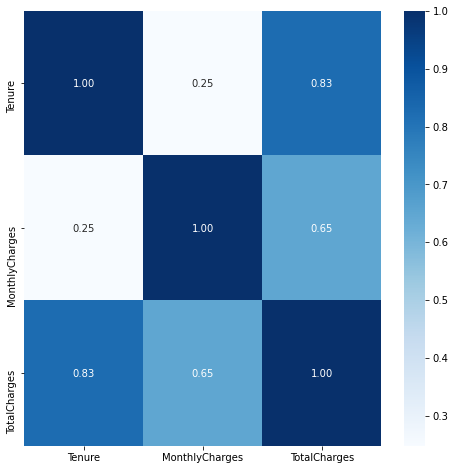

In [15]:
# Checking the correlation between numerical features
plt.figure(figsize=(8,8))
sns.heatmap(raw_df.corr(), cmap = 'Blues', annot=True, fmt=".2f")

In [16]:
# Removing rows with Price greater than 80000
#raw_df.drop(raw_df.loc[ raw_df["TotalCharges"] > 6000].index, inplace=True)

Out of all numerical features we can see that Total Charges and Tenure are higly correlated (correlation is 0.83).

## 4.2 Checking Attributes Distribution

###  Churn Distribution: yes or no

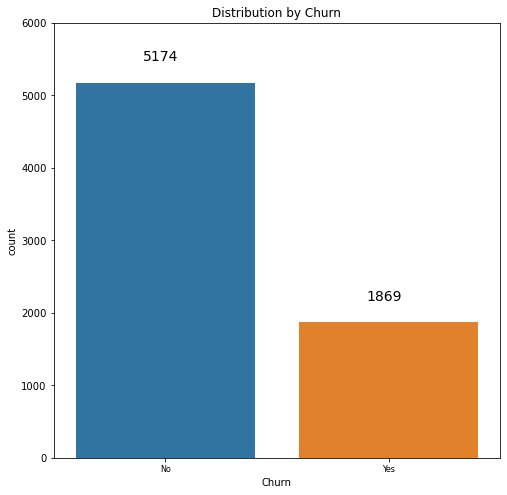

Number of people by churn:  {'No': 5174, 'Yes': 1869}

Customer Attrition Ratio:
Yes: %26.54
No: %73.46


In [17]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x='Churn',data=raw_df)
plt.xticks([0,1], ['No', 'Yes'], fontsize = 8)
plt.ylim(0,6000)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+300), fontsize = 14)
plt.title("Distribution by Churn")
plt.show()
# creating function to find the percentage of Yes and No churn (attrition ratio)
def percentage_ratios(raw_df,col):
    for i in sorted(raw_df[col].unique(),reverse=True):
        print('%s: %%%.2f' % (i, 100*raw_df[col].value_counts()[i]/len(raw_df)))

print('Number of people by churn: ', dict(Counter(raw_df['Churn'])))
print('\nCustomer Attrition Ratio:')
percentage_ratios(raw_df,'Churn')

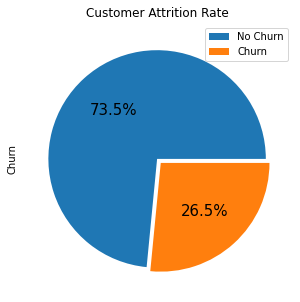

In [18]:
plt.figure(figsize=(7,5))

raw_df['Churn'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%',explode = [0,0.05], textprops = {"fontsize":15})

plt.legend(labels=['No Churn', 'Churn'])
plt.title("Customer Attrition Rate")
plt.show()

### Tenur distribution by churn

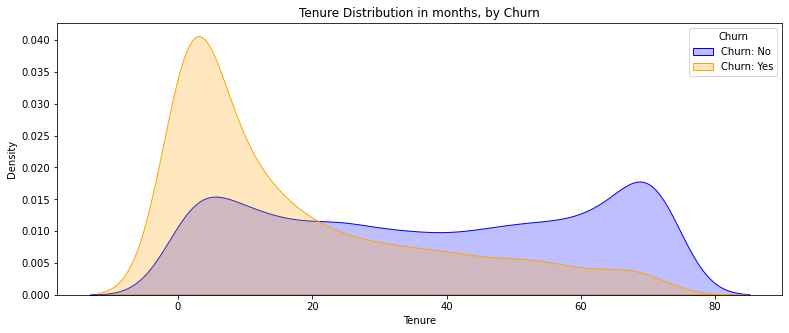

Average Tenure of Churned Customers: 18 
Average Tenure of Not-Churned Customers: 38


In [19]:
churned_customer_by_tenure=raw_df[raw_df.Churn=='Yes']['Tenure']
not_churned_customer_by_tenure=raw_df[raw_df.Churn=='No']['Tenure']

plt.figure(figsize=(13,5))
sns.kdeplot(data=not_churned_customer_by_tenure, shade=True, color = 'blue')
sns.kdeplot(data=churned_customer_by_tenure, shade=True, color = 'orange')
plt.legend(("Churn: No", "Churn: Yes"),title='Churn')
plt.title("Tenure Distribution in months, by Churn")

plt.show()

print('Average Tenure of Churned Customers:',round(churned_customer_by_tenure.mean()),
      '\nAverage Tenure of Not-Churned Customers:',round(not_churned_customer_by_tenure.mean()))

According to the graph, we can see that customers who did not churn have a much more longer tenure time than customers who decided to churn

### Total Charges distribution by churn

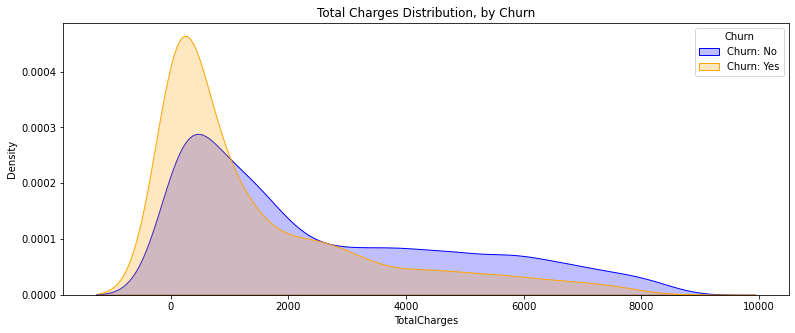

In [20]:
churned_customer_by_totalcharges=raw_df[raw_df.Churn=='Yes']['TotalCharges']
not_churned_customer_by_totalcharges=raw_df[raw_df.Churn=='No']['TotalCharges']

plt.figure(figsize=(13,5))
sns.kdeplot(data=not_churned_customer_by_totalcharges, shade=True, color = 'blue')
sns.kdeplot(data=churned_customer_by_totalcharges, shade=True, color = 'orange')
plt.legend(("Churn: No", "Churn: Yes"),title='Churn')
plt.title("Total Charges Distribution, by Churn")

plt.show()

### Monthly Charges distribution by churn

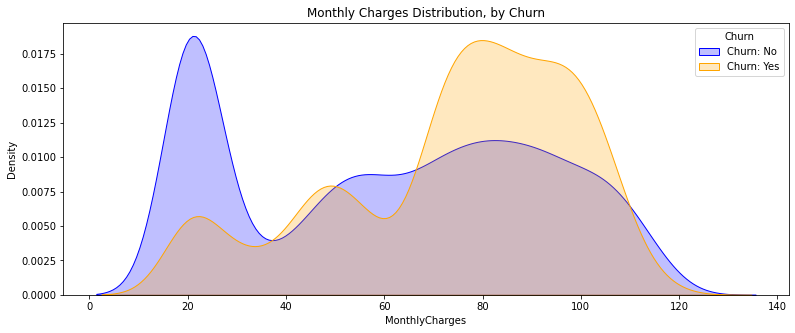

In [21]:
churned_customer_by_monthlycharges=raw_df[raw_df.Churn=='Yes']['MonthlyCharges']
not_churned_customer_by_monthlycharges=raw_df[raw_df.Churn=='No']['MonthlyCharges']

plt.figure(figsize=(13,5))
sns.kdeplot(data=not_churned_customer_by_monthlycharges, shade=True, color = 'blue')
sns.kdeplot(data=churned_customer_by_monthlycharges, shade=True, color = 'orange')
plt.legend(("Churn: No", "Churn: Yes"),title='Churn')
plt.title("Monthly Charges Distribution, by Churn")

plt.show()

In [22]:
print("Everage monthly charges by churn")
print(raw_df.groupby(by=['Churn'])['MonthlyCharges'].mean().sort_values(), '\n')
print()
print("Everage total charges by churn")
print(raw_df.groupby(by=['Churn'])['TotalCharges'].mean().sort_values())

Everage monthly charges by churn
Churn
No     61.265124
Yes    74.441332
Name: MonthlyCharges, dtype: float64 


Everage total charges by churn
Churn
Yes    1531.796094
No     2549.911442
Name: TotalCharges, dtype: float64


## Conclusion
Customers with higher monthly charges tend to churn the company.

For  total charges, we can observe that churned customers payed less in total compared to non-churned customers. This seems logical as non-churned customers stay with company less time.


### Churn Distribution based on the years spent with company

In [23]:
# creating bins for year range
raw_df['tenure_bin'] = pd.cut(raw_df['Tenure'],[-1,12,24,36,48,60,100])
raw_df['tenure_bin'].value_counts(sort = False)

(-1, 12]     2186
(12, 24]     1024
(24, 36]      832
(36, 48]      762
(48, 60]      832
(60, 100]    1407
Name: tenure_bin, dtype: int64

In [24]:
#Label encoding Churn to use sns.barplot
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
raw_df['Churn'] = le.fit_transform(raw_df['Churn'])
raw_df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

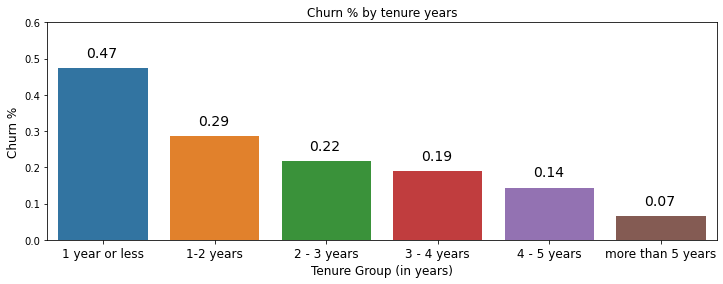

In [25]:
# creating bar plot

plt.figure(figsize=(12,4))

ax = sns.barplot(x = "tenure_bin", y = "Churn", data = raw_df, ci = None)

plt.ylabel("Churn %", fontsize= 12)
plt.ylim(0,0.6)
plt.xticks([0,1,2,3,4,5], ['1 year or less', '1-2 years', '2 - 3 years', '3 - 4 years', '4 - 5 years', 'more than 5 years'], fontsize = 12)
plt.xlabel("Tenure Group (in years)", fontsize= 12)
plt.title("Churn % by tenure years")



for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=14)

plt.show()

### Conclusion
We can observe extremly high churn rate (47 %) in the first year and high churn rate (29 %)  in the second year. It can be an indicator that telco company does not meet the expectation of its customers. The problem could be in the quality of the service provided.

Creating variables for different kind of attributes

In [26]:
demographic_attributes = ['Gender', 'SeniorCitizen', 'Partner', 'Dependents']

service_attributes = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup'
                , 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

contract_attributes = ['Contract', 'PaperlessBilling', 'PaymentMethod']

### Distributions of the demographic attributes

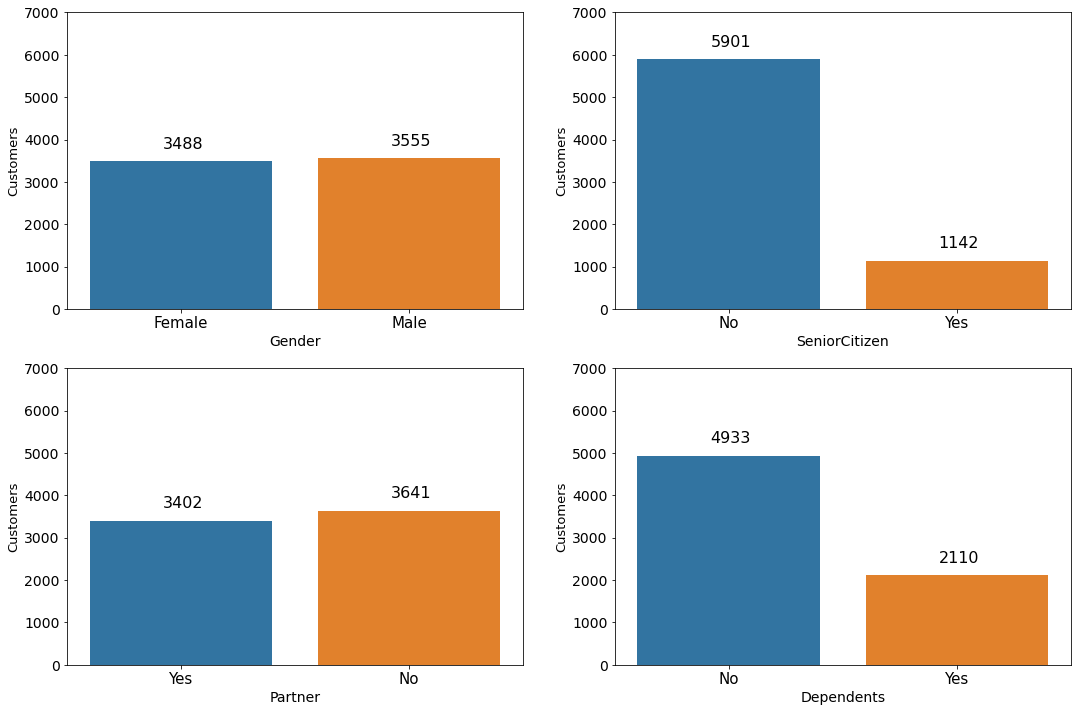

In [27]:
plt.figure(figsize=(18,12))
for i,col in enumerate(demographic_attributes):    
    plt.subplot(2,2,i + 1)
    
    ax = sns.countplot(data = raw_df, x = col)

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("Customers", fontsize= 13)
    plt.ylim(0,7000)
    plt.xticks(fontsize= 15)
    plt.yticks(fontsize= 14)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+300), fontsize= 16)



plt.show()

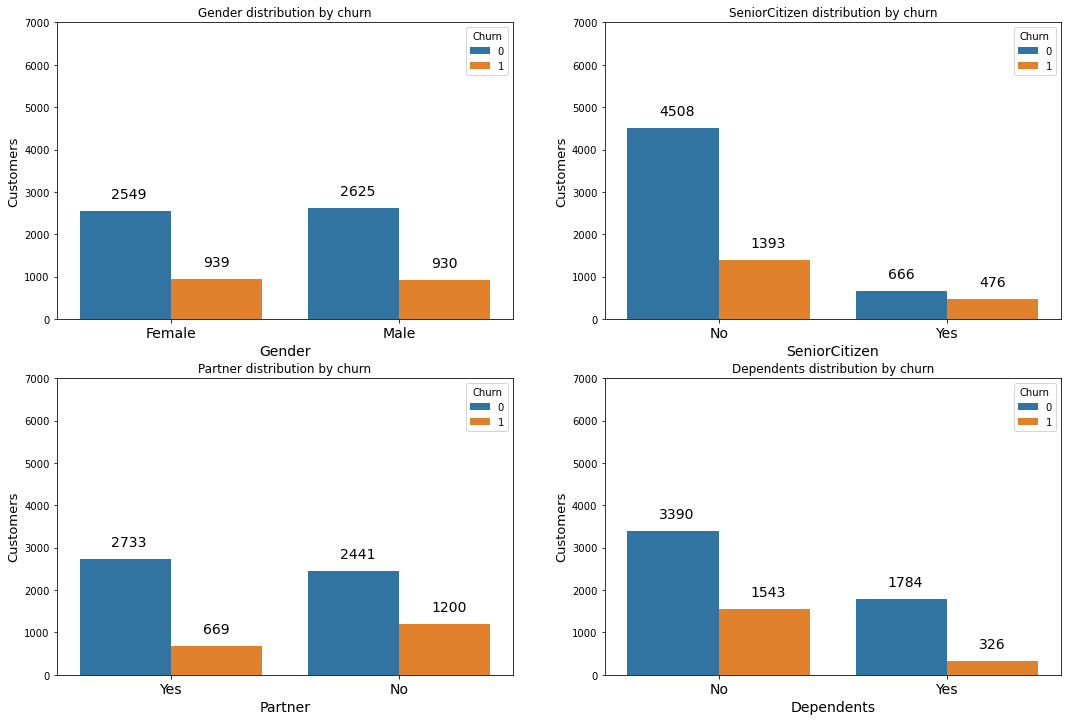

In [28]:

plt.figure(figsize=(18,12))


for i,col in enumerate(demographic_attributes):    
    plt.subplot(2,2,i + 1)
    
    ax = sns.countplot(data = raw_df, x = col, hue="Churn")

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("Customers", fontsize= 13)
    plt.ylim(0,7000)
    plt.xticks(fontsize= 14)
    plt.title("{} distribution by churn".format(col))

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.14, p.get_height()+300), fontsize= 14)
        



plt.show()

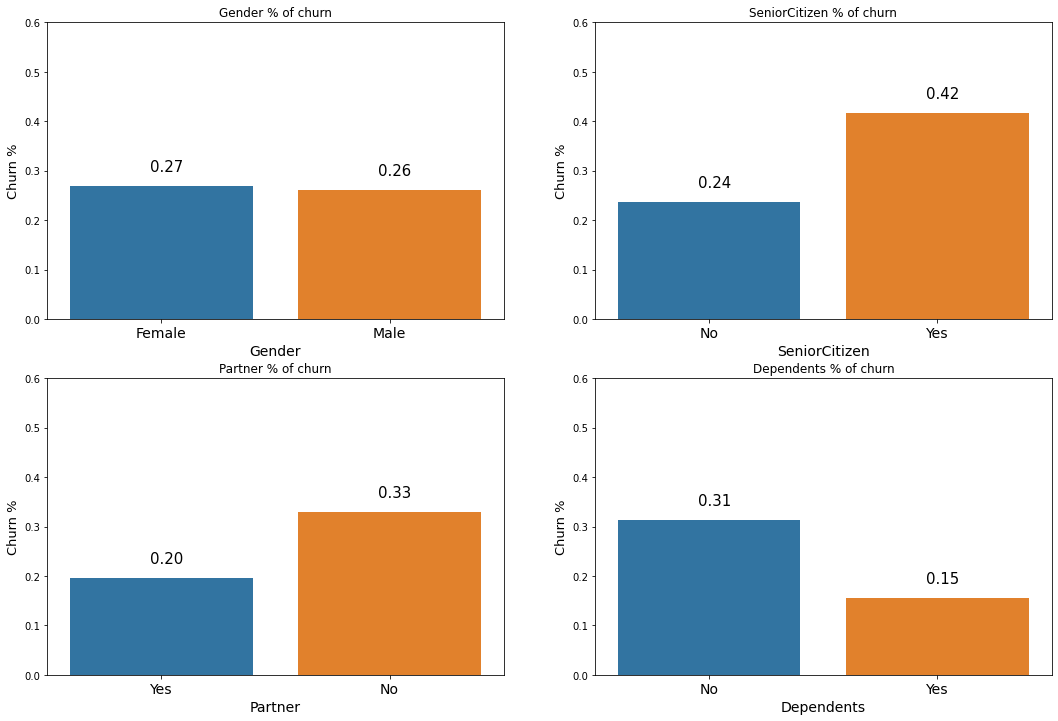

In [29]:


plt.figure(figsize=(18,12))

for i,col in enumerate(demographic_attributes):    
    plt.subplot(2,2,i + 1)
    
    ax = sns.barplot(x = col, y = "Churn", data = raw_df, ci = None)

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("Churn %", fontsize= 13)
    plt.ylim(0,0.6)
    plt.xticks(fontsize= 14)
    plt.title("{} % of churn".format(col))

    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.35, p.get_height()+0.03),fontsize=15)


plt.show()

Conclusion about the demographic attributes
There is no big difference in churn percentage between men and women.

Senior Citizen are more likely to decide to churn ( 42 % churned in that group of customers).
Single customers are more likely to churn than customers with partners.
Customers with dependents are less likely to churn than customers without any dependents.

###  Distributions related to contract attributes

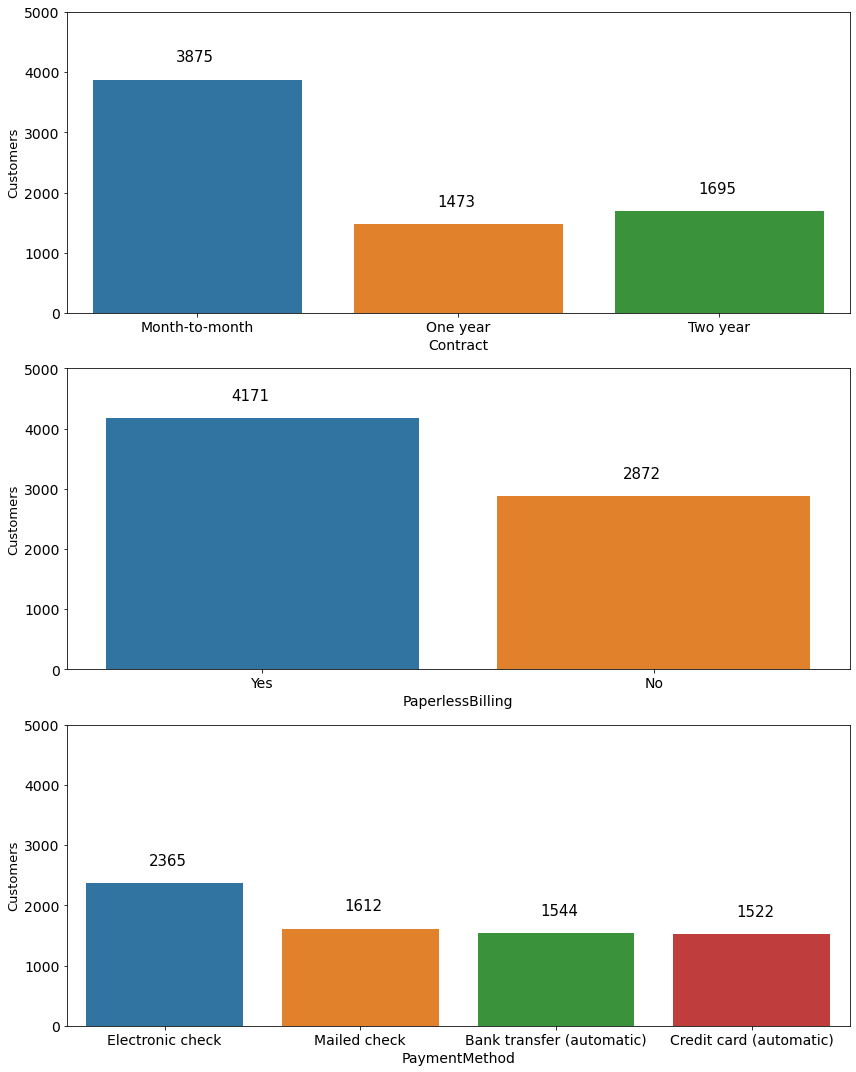

In [30]:
plt.figure(figsize=(12,15))


for i,col in enumerate(contract_attributes):    
    plt.subplot(3,1,i + 1)
    
    ax = sns.countplot(data = raw_df, x = col)

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("Customers", fontsize= 13)
    plt.ylim(0,5000)
    plt.xticks(fontsize= 14)
    plt.yticks(fontsize= 14)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+300), fontsize= 15)

plt.tight_layout()

plt.show()

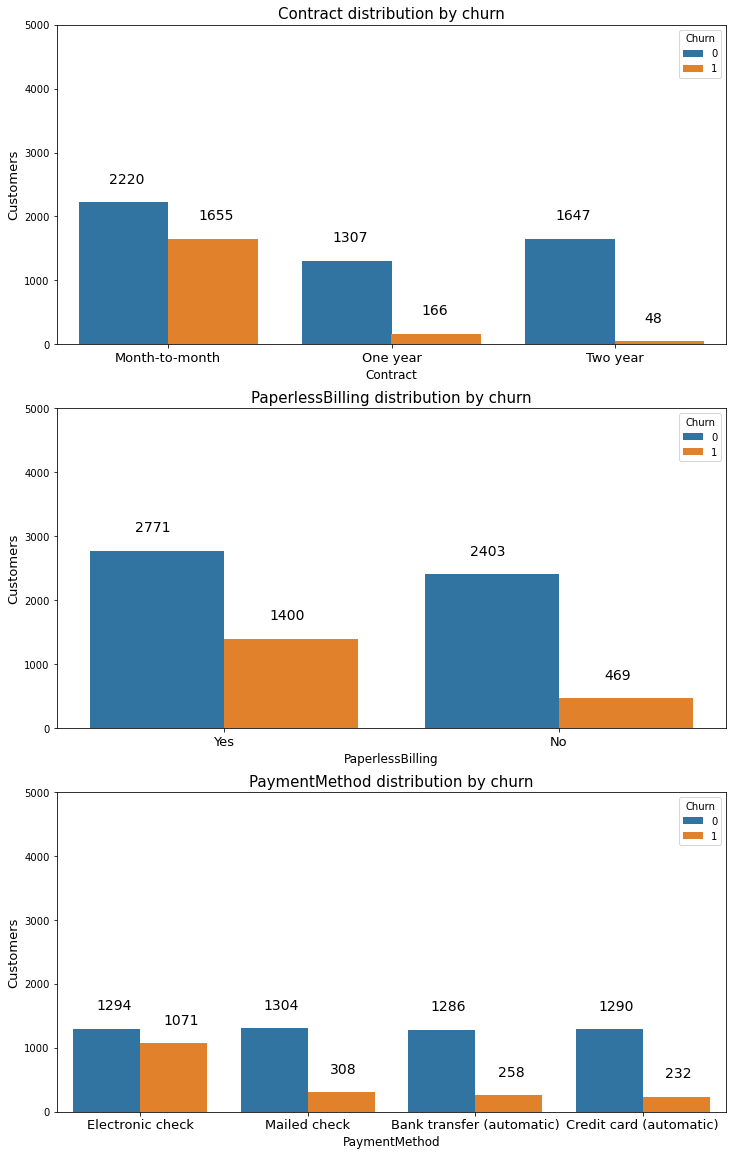

In [31]:
plt.figure(figsize=(12,20))

for i,col in enumerate(contract_attributes):    
    plt.subplot(3,1,i + 1)
    
    ax = sns.countplot(data = raw_df, x = col, hue="Churn")

    plt.xlabel(col, fontsize= 12)
    plt.ylabel("Customers", fontsize= 13)
    plt.ylim(0,5000)
    plt.xticks(fontsize= 13)
    plt.title("{} distribution by churn".format(col),fontsize= 15)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.135, p.get_height()+300), fontsize= 14)



plt.show()

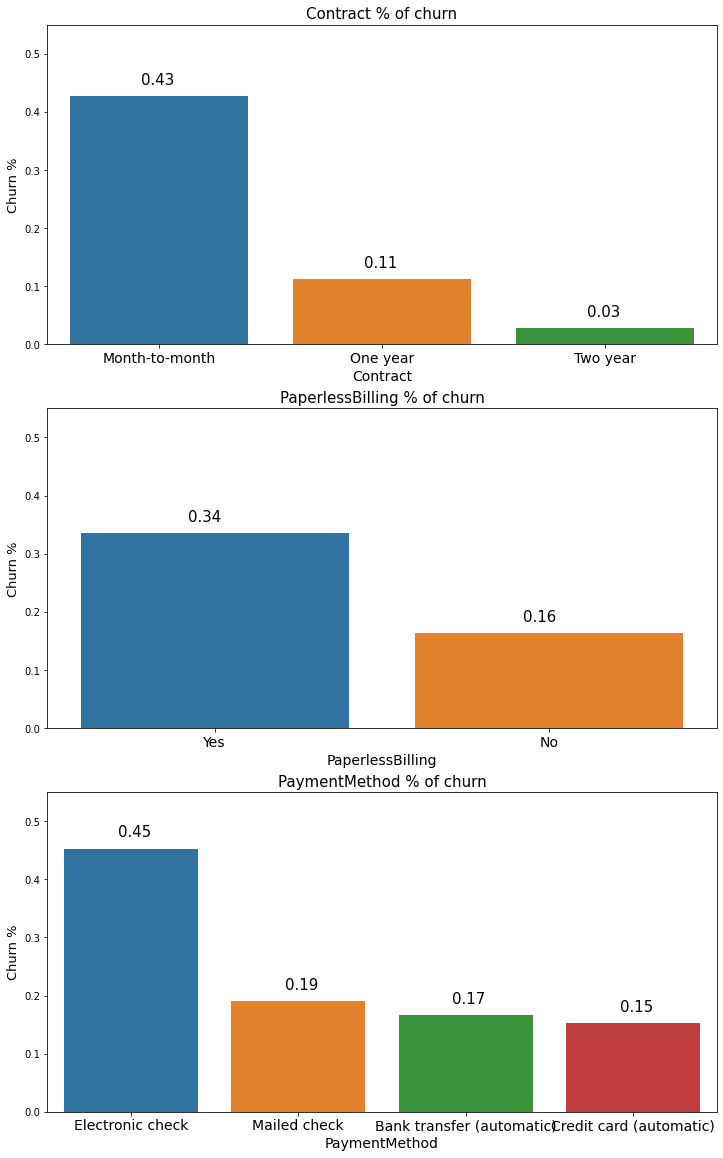

In [32]:
plt.figure(figsize=(12,20))

for i,col in enumerate(contract_attributes):    
    plt.subplot(3,1,i + 1)
    
    ax = sns.barplot(x = col, y = "Churn", data = raw_df, ci = None)

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("Churn %", fontsize= 13)
    plt.ylim(0,0.55)
    plt.xticks(fontsize= 14)
    plt.title("{} % of churn".format(col),fontsize= 15)

    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.32, p.get_height()+0.02),fontsize=15)


plt.show()

### Conclusion
From the data, we observe the the highest churn rate is from the ‘month-to-month’ type of contract which seems true as the customers on the monthly contarct cab easily churn and choose another provider with better up to date promotions or rates.
There is a high percentage of churned customers who chose electronic check as a payment methos and paperless billing. 

### Distributions related to services

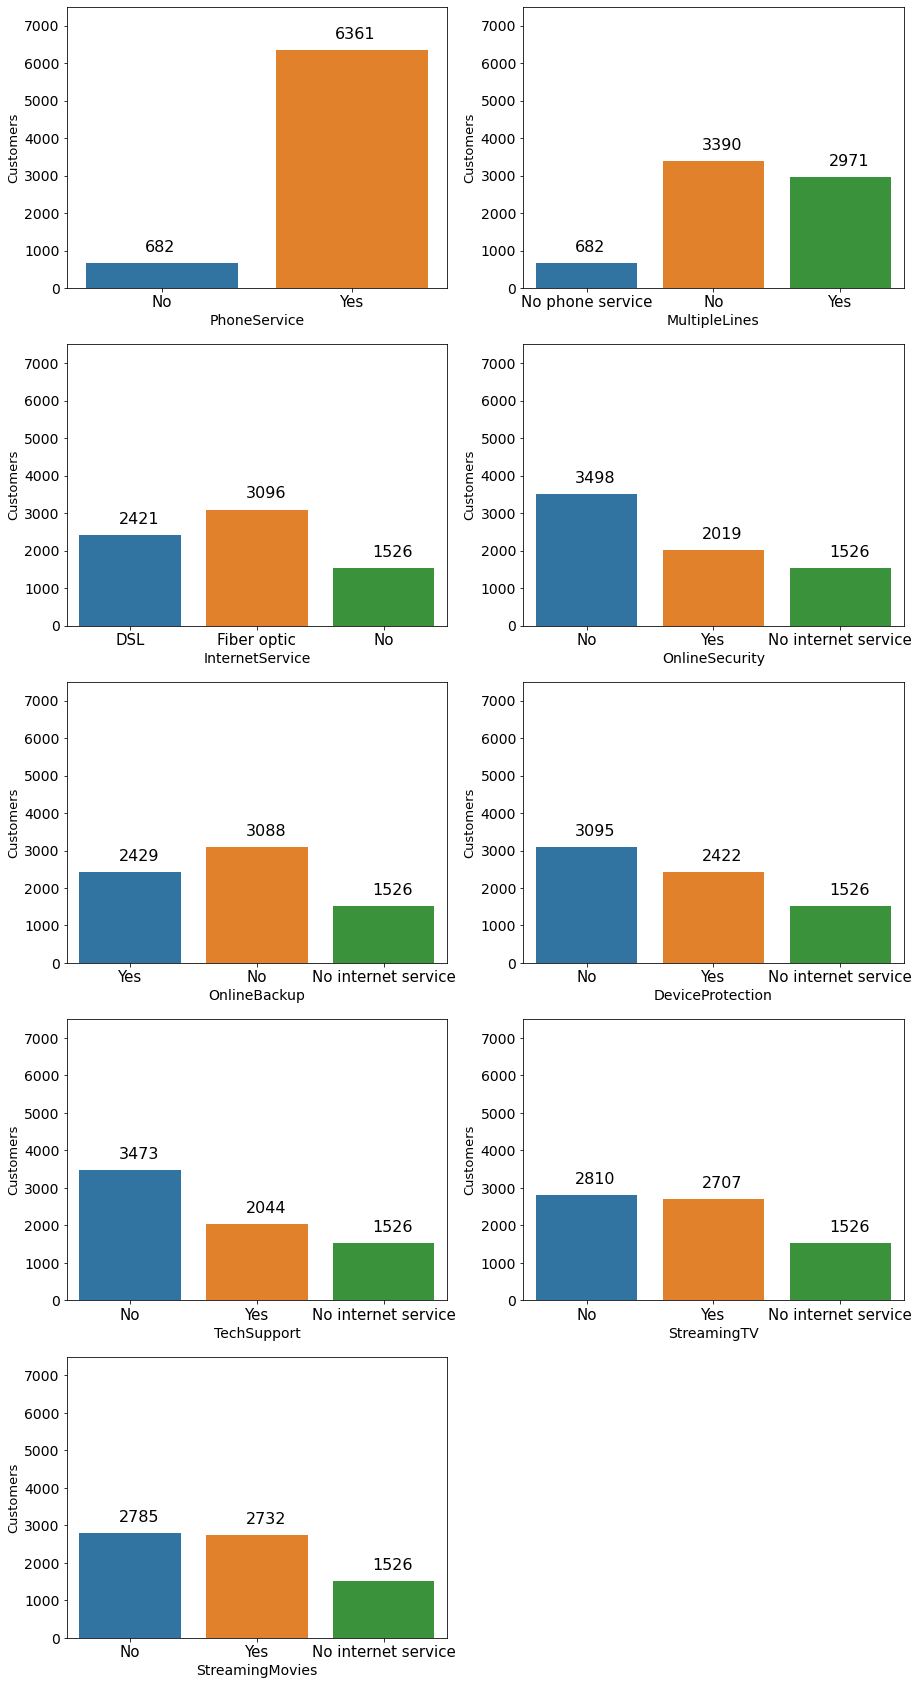

In [33]:

plt.figure(figsize=(15,30))

for i,col in enumerate(service_attributes):    
    plt.subplot(5,2,i + 1)
    
    ax = sns.countplot(data = raw_df, x = col)

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("Customers", fontsize= 13)
    plt.ylim(0,7500)
    plt.xticks(fontsize= 15)
    plt.yticks(fontsize= 14)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.31, p.get_height()+300), fontsize= 16)


plt.show()

Small group of customers doesn’t have internet services or phone services.  Probably, some services (like streaming movies or TV, device protection, or tech support) are provided to customers only if they signed in for internet service from the telco operator. 

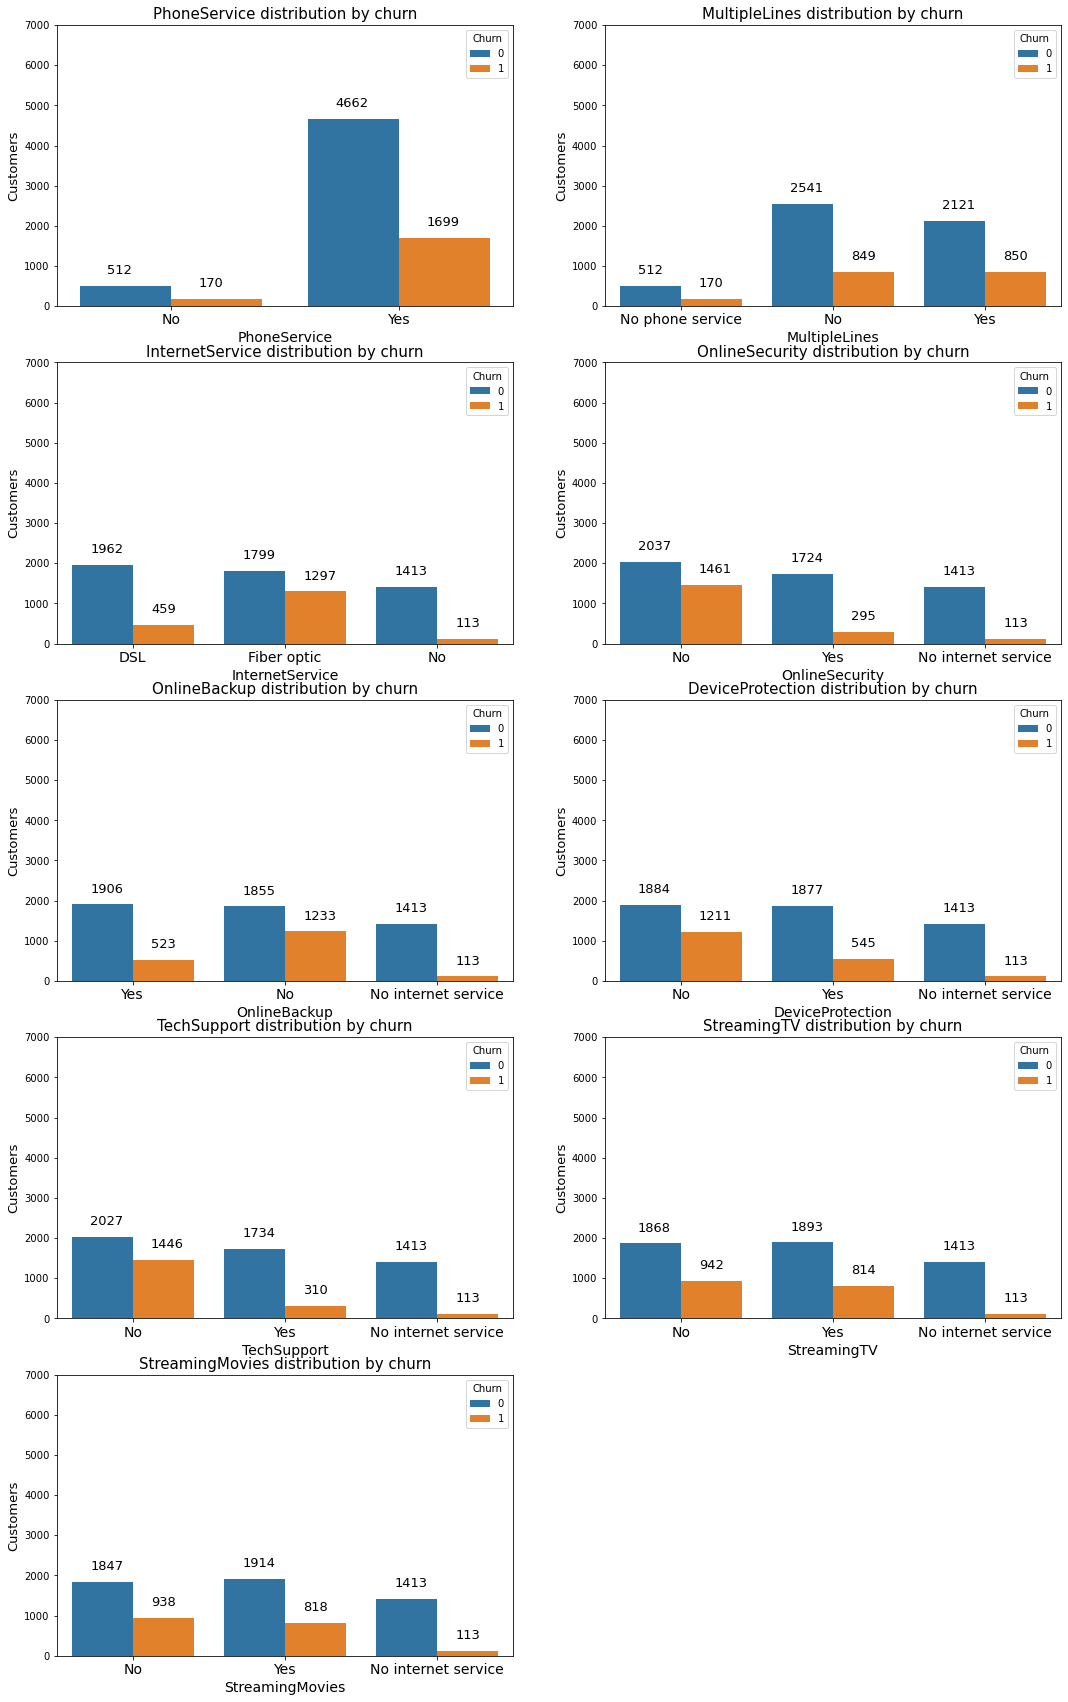

In [34]:
plt.figure(figsize=(18,30))

for i,col in enumerate(service_attributes):    
    plt.subplot(5,2,i + 1)
    
    ax = sns.countplot(data = raw_df, x = col, hue="Churn")

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("Customers", fontsize= 13)
    plt.ylim(0,7000)
    plt.xticks(fontsize= 14)
    plt.title("{} distribution by churn".format(col),fontsize= 15)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.12, p.get_height()+300), fontsize= 13)


plt.show()

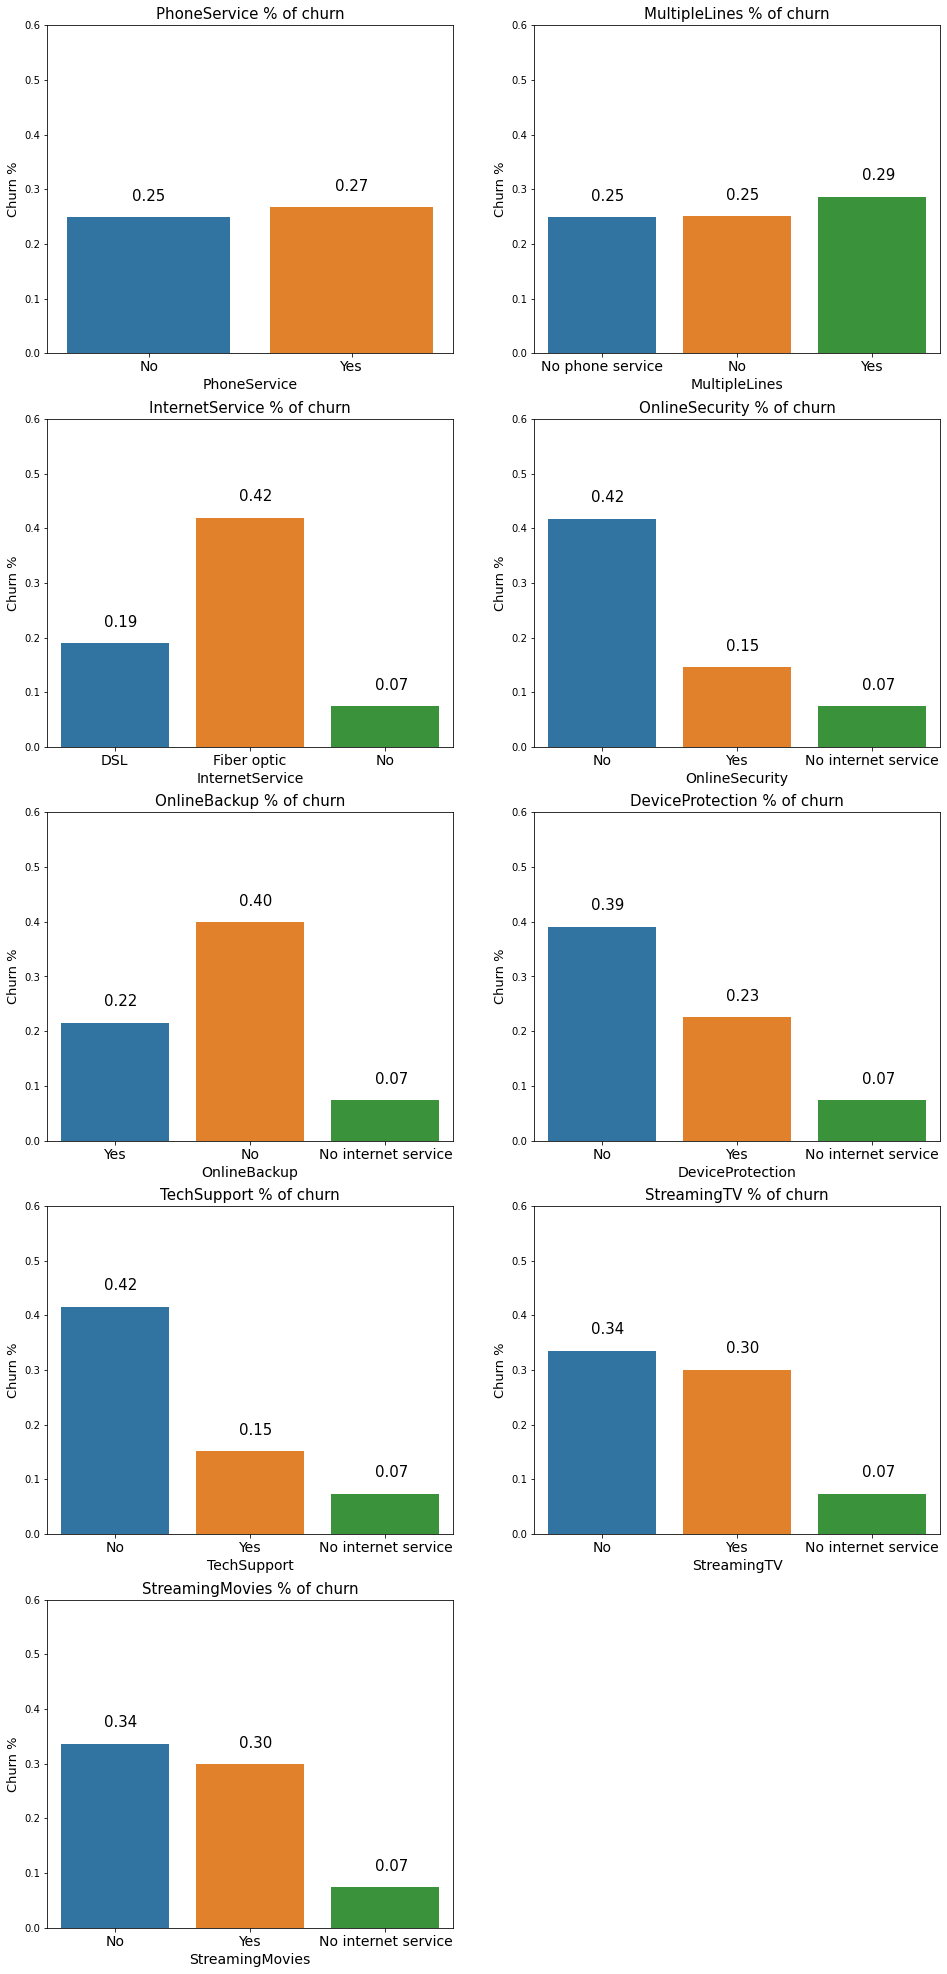

In [35]:
plt.figure(figsize=(16,35))

for i,col in enumerate(service_attributes):    
    plt.subplot(5,2,i + 1)
    
    ax = sns.barplot(x = col, y = "Churn", data = raw_df, ci = None)

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("Churn %", fontsize= 13)
    plt.ylim(0,0.6)
    plt.xticks(fontsize= 14)
    plt.title("{} % of churn".format(col),fontsize= 15)

    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.32, p.get_height()+0.03),fontsize=15)

plt.show()

### Conclusion
First, people who do not use the internet offered by telco provider is more likely to stay with with company (only 0.07 % of churn in this category). The reason could be in an affordable telco price without internet.

According to data visualization, we can observe that there is no big difference in customers' churn based on using streaming videos or TV, or multiple lines, or phone service. 

On the other hand, there is high more than  40 % customers' churn when the customers do not use Tech Support, device protection, online backup, online security. It could mean that the customers are not happy with telco provider prices when they do not have bunch of additional useful services. So the reason could be in a low price/quality ratio.

In addition, there is an extremely high 48% churn rate  in case when customers are using fiber optic internet. We can make assumption that this expensive telco service does not meet quality expactations.

# 5. Machine Learning. Creating model for prediction customers' churn.

## 5.1 Feature Engineering

### Prepare dataframe to be used in the model

In [36]:
raw_df = raw_df.drop("tenure_bin", axis=1)

In [37]:
df = raw_df.copy()

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   Tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


### Encoding categorical features

In [39]:
#Get a list of categorical features, that are columns with datatype "object"
categorical_columns_list = df.select_dtypes('object').columns

#Create dummies for all the categorical features
for categorical_column in categorical_columns_list:
    #Get k-1 dummies adding a prefix
    dummies_columns = pd.get_dummies(df[categorical_column],prefix=categorical_column,drop_first=True)
    #Add to the dataframe
    df = df.join(dummies_columns)
    #Drop original column
    df.drop(categorical_column, axis=1, inplace=True)
    
#Checking dataset
print("\nDataset Shape: ", df.shape)
display(df.head())


Dataset Shape:  (7043, 31)


,Tenure,MonthlyCharges,TotalCharges,Churn,Gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


## 5.2 Creating machine learning pipeline: scalar plus classifier model for prediction

Machine learning pipeline will go through all combinations of the scalar + classifier model to find the best model for predicting the customer churn.

#### Dividing the dataset into target and features

In [40]:
# Divide the dataset into features (independent variables) and target (dependent variable)
target = df["Churn"]
features = df.drop("Churn", axis=1) #remove the dependent var from the feature dataset

#### Creating the dataframe to hold results

In [41]:
#Create a dataframe to hold the results
results_df = pd.DataFrame(
    columns=["Scalar", 
             "Classifier Model",
             "Mean accuracy",
             "Accuracy on test data",
              ])

#Set type as integer
results_df["Mean accuracy"] = results_df["Mean accuracy"].astype('float64')
results_df["Accuracy on test data"] = results_df["Mean accuracy"].astype('float64')


#### Spliting data into train and test data sets

In [42]:
#Split the data into Training and Test data frames randomly using relation training/test = 75:25 
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.25, random_state=102)
print("Training and Test data frames were split successfully\n")

print("X_train Shape:", X_train.shape)
print("Y_train Shape:", Y_train.shape, "\n")

print("X_test Shape:", X_test.shape)
print("Y_test Shape:", Y_test.shape, "\n")

Training and Test data frames were split successfully

X_train Shape: (5282, 30)
Y_train Shape: (5282,) 

X_test Shape: (1761, 30)
Y_test Shape: (1761,) 



### Prediction model building

#### Classifiers to be used:

SVM - Support Vector Machines

Logistic Regression without classifier

Naive Bayes Classifier

Random Forest Classifier

Ada BOOST Classifier

XGBOOST Classifier

Soft Voting Classifier (estimators: Logistic regression, KNN, Decision Tree)

MLP (multilayer perceptron) classifier


#### Scalar to be used:
MinMax Scalar. The range for min and max values will be 0 and 1 respectively. It allows to have all data values in the same scaling category.

Standard Scalar

### Creating models and array of models

In [43]:
#Setting SVM model
svm_model = SVC(kernel='linear') 
#Setting Logistic Regression model
logreg_model = LogisticRegression(class_weight='balanced', max_iter=500,
                                penalty='l1', solver='liblinear',
                                verbose=0, C=20)
#Setting Naive Bayes Classifier
nb_model = GaussianNB()
#Setting Random Florest Classifier using max depth equal to 5 and estimators equal to 500
forest_model = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  max_features = "auto",
                                  max_leaf_nodes = 30)
# Setting KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)
#Setting Ada BOOST Classifier using learning rate equal to 0.1                   
ada_model = AdaBoostClassifier(learning_rate=1)
#Setting XGBOOST Classifier
xgboost_model = XGBClassifier(use_label_encoder=False, eval_metric ='error')
#Soft Voting with classifiers
soft_model = VotingClassifier(estimators=[('Logistic Regression', logreg_model),
                                      ('KNeighbors', KNeighborsClassifier(n_neighbors=3)), 
                                      ('Decision Tree', DecisionTreeClassifier(max_depth=5, random_state=102))], voting='soft')

#Setting MLP classifier
mlp_model = MLPClassifier(learning_rate_init=0.1,max_iter=1000, random_state=102,hidden_layer_sizes=(10, 5))



In [44]:
#Create array with all the models that are going to be performed
classifier_models_array = [svm_model,
                           logreg_model,
                           nb_model,
                           forest_model,
                           knn_model,
                           ada_model,
                           xgboost_model,
                           soft_model,
                           mlp_model
                          ]

### Creating the scalar

In [45]:
scalars = [MinMaxScaler(feature_range = (0,1)), StandardScaler()]

### Creating pipeline with cross-validation

In [46]:
best_score = 0

#Set a KFold cross validation using number of folds equal to 10
kfold = KFold(n_splits = 10)

for scalar in scalars:
    for classifier_model in classifier_models_array:
    
        pipe = Pipeline(steps=[ ('scalar',scalar), 
                                ('classifier',classifier_model)])
            
           
        clf_model_scores = cross_val_score(pipe, X_train, Y_train, cv = kfold) 
            
        clf_model_score_mean = np.mean(clf_model_scores)    
            
        if clf_model_score_mean > best_score:
            best_score = clf_model_score_mean
            best_parameters = {"Scalar":scalar,"Model": classifier_model}
            best_model= classifier_model
                
        pipe.fit(X_train, Y_train)
        Y_pred= pipe.predict(X_test)
        accuracy = accuracy_score(Y_test,Y_pred)
            
        item = {"Scalar": scalar,
        "Classifier Model": classifier_model,
        "Mean accuracy": clf_model_score_mean,
        "Accuracy on test data": accuracy              
        }
        results_df = results_df.append(item, ignore_index=True)
                      
print("Classifier model with the highest score is: {}".format(best_model))
print("The highest score is : {:.6f}".format(best_score))
print("Best parameters: {}".format(best_parameters))


Classifier model with the highest score is: AdaBoostClassifier(learning_rate=1)
The highest score is : 0.800828
Best parameters: {'Scalar': StandardScaler(), 'Model': AdaBoostClassifier(learning_rate=1)}


In [47]:
#Check results
#pd.set_option('display.max_colwidth', None)
print("Results of Cross Validation:\n")
display(results_df)

Results of Cross Validation:



,Scalar,Classifier Model,Mean accuracy,Accuracy on test data
0,MinMaxScaler(),SVC(kernel='linear'),0.796475,0.803521
1,MinMaxScaler(),"LogisticRegression(C=20, class_weight='balance...",0.740624,0.750142
2,MinMaxScaler(),GaussianNB(),0.658465,0.671210
3,MinMaxScaler(),"(DecisionTreeClassifier(max_features='auto', m...",0.798368,0.809767
4,MinMaxScaler(),KNeighborsClassifier(n_neighbors=3),0.747819,0.751846
5,MinMaxScaler(),"(DecisionTreeClassifier(max_depth=1, random_st...",0.800639,0.808064
6,MinMaxScaler(),"XGBClassifier(base_score=0.5, booster='gbtree'...",0.784357,0.793867
7,MinMaxScaler(),VotingClassifier(estimators=[('Logistic Regres...,0.783222,0.793867
8,MinMaxScaler(),"MLPClassifier(hidden_layer_sizes=(10, 5), lear...",0.798559,0.795571
9,StandardScaler(),SVC(kernel='linear'),0.795907,0.801817


## 5.3 Training and Testing Selected Model

Best model is AdaBoost Classifier using MinMax Scaler.

### Scaling the features before model training and testing

In [48]:
#Set MinMax Scaler
minmax_scaler = StandardScaler()

#Applying scaling onto features 
scaled_features = minmax_scaler.fit_transform(features)

In [49]:
print(scaled_features)

[[-1.27744458 -1.16032292 -0.99261052 ... -0.52504733  1.40641839
  -0.54480692]
 [ 0.06632742 -0.25962894 -0.17216471 ... -0.52504733 -0.71102597
   1.83551265]
 [-1.23672422 -0.36266036 -0.9580659  ... -0.52504733 -0.71102597
   1.83551265]
 ...
 [-0.87024095 -1.1686319  -0.85293201 ... -0.52504733  1.40641839
  -0.54480692]
 [-1.15528349  0.32033821 -0.87051315 ... -0.52504733 -0.71102597
   1.83551265]
 [ 1.36937906  1.35896134  2.01389665 ... -0.52504733 -0.71102597
  -0.54480692]]


In [50]:
#Split the data into Training and Test data frames randomly using relation training/test = 75:25 
X_train, X_test, Y_train, Y_test = train_test_split(scaled_features, target, test_size=0.25, random_state=102)
print("Training and Test data frames were split successfully\n")

Training and Test data frames were split successfully



In [51]:
#Run the best model
#best_model=adaboost_model
ada_model.fit(X_train, Y_train)

#Get predictions using the best model
Y_pred= ada_model.predict(X_test)

# Print results
print(accuracy_score(Y_test,Y_pred))

0.8080636002271436


### Creating confusion matrix

Confusion Matrix


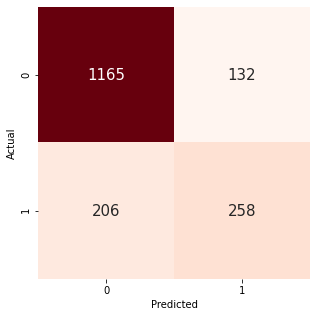

In [52]:
#Compute the Confusion Matrix
model_conf_matrix = confusion_matrix(Y_test, Y_pred)
#Create a dataframe to plot
conf_matrix_df = pd.DataFrame(model_conf_matrix, columns=np.unique(Y_test), index = np.unique(Y_test))
conf_matrix_df.index.name = 'Actual'
conf_matrix_df.columns.name = 'Predicted'

#Plot the Confusion Matrix
print("Confusion Matrix")
plt.figure(figsize = (5,5))
sns.heatmap(conf_matrix_df, 
            annot=True,
            annot_kws={"size": 15}, 
            cbar=False,
            square=True, 
            fmt="d", 
            cmap="Reds")
plt.show()

### Generating Classification Report

In [53]:
#Generate the classification report
model_classific_report = classification_report(Y_test, Y_pred)

#Show the report
print("Classification Report")
print()
print(model_classific_report)

Classification Report

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1297
           1       0.66      0.56      0.60       464

    accuracy                           0.81      1761
   macro avg       0.76      0.73      0.74      1761
weighted avg       0.80      0.81      0.80      1761



### Generating ROC Curve

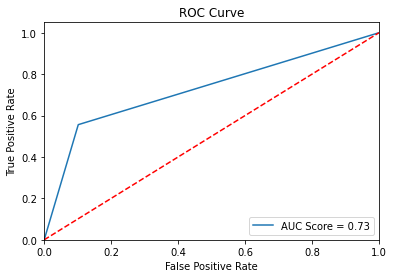

In [54]:
#Generate the ROC Curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
#Compute AUC score
model_roc_auc = roc_auc_score(Y_test, Y_pred)

#Plot the ROC Curve 
plt.figure()
plt.plot(fpr, tpr, label='AUC Score = %0.2f' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

### Generating Rrecision Recall Curve

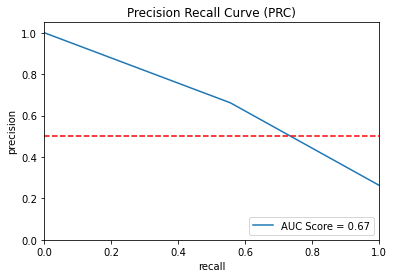

In [55]:
#Generating the PRC - Precision Recall Curve
precision, recall,thresholds= precision_recall_curve(Y_test, Y_pred)

#Computing AUC
auc_prc = auc(recall, precision)

#plt.figure(figsize = (10,12))
plt.figure()
plt.plot(recall, precision, label = 'AUC Score = %0.2f' % auc_prc)
plt.plot([0, 1],[0.5, 0.5],'r--')
plt.xlabel('recall')
plt.ylabel('precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Precision Recall Curve (PRC)')
plt.legend(loc="lower right")
plt.show()

### 5.4 Model evaluation and conclusion

In [56]:
#Comparing the number os rows with Churn Yes or No in the entire data set
churn_df = df.groupby(["Churn"]).Churn.count()

print("\nNumber of rows in the entire data set:\n ",
      target.shape)

print("\nNumber of total rows in the data set and comparison the number of rows with Churn Yes and No:\n ",
      churn_df  )


print("\nNumber of rows in the testing data set: ",Y_test.shape )


Number of rows in the entire data set:
  (7043,)

Number of total rows in the data set and comparison the number of rows with Churn Yes and No:
  Churn
0    5174
1    1869
Name: Churn, dtype: int64

Number of rows in the testing data set:  (1761,)


The best model has been evaluated based on the 25 % of the data set (1761 rows out of 7043)

Based on the confusion matrix and classification report there are 1297 actual negative values (Support Churn 0) and 464 positive values (Churn 1). 

Negative values (churn 0) comprise 74 % of the total test data while positive values (churn 1) comprise 26 % respectively. The test data set has a high skewness to the left(more negative values).

We can observe the same percentage distribution for the whole dataset (5174 churn no and 1869 churn yes represent 73% and 27% of the data points respectively) which means that the Test dataset distribution represents the entire dataset distribution.

Precision for positive (churn yes): 
TP/(TP+FP) = 258/(258+132) = 0.66 . This means that out of all data points identified as positive point (churn yes) our model can identify only 66 % correctly.

Precision for negarive( churn no)
TN/(TN+FN) = 1165(1165+206) = 0.85.This means that out of all data points identified as negative point (churn no) our model can identify 85 % correctly.

There is a huge difference between precision for positive values and precision for negative values.

Recall for positive (churn yes):
TP/(TP+FN) = 258/(258+206) = 0.56. This means that out of all actual positive values in the test data set our model can identify(predict) 56 % of positive values correctly.

Recall for negative (churn no):
TN/(TN+FP) = 1165/(1165+132) = 0.9. This means that out of all actual negative values in the test data set our model can identify(predict) 90% of negative values correctly.

We can see that recall for negative values (churn no) is  significantly better than recall for positive values(churn yes). 
Therefore our model produces more accurate predictions the larger the test sample (in our case there are more negative values than positive in the test data). Our model tends to predict the value as negative more often and thats why we have much more false negative results than false positive (206 compared to 132). For reducing this prediction bias we can reduce the sqeweness of the entire data set by sampling data with equal number of positive and negative values.

f1-score(which combines precision and recall together) is 0.87 for negative values and 0.6 for positive values. f1-scores for negative values is good as it indicates we have both quite high recall and precision for negative values. On the contrary, f1 score for positive vakues is low.

The weighted average accuracy for the model is 0.81 (or 81 %) as can be seen from the classification report. This result seems moderate.

The ROC curve (receiver operating characteristic curve) shows the performance of our classification model. AUC (area under the curve) was computed as 0.83 which indicates moderate result.

Presicion-recall curve (PRC) is a direct representation of the precision(y-axis) and the recall(x-axis). The aim of our model is to have a high AUC because it means that both precision and recall are high and therefore the model makes distinctions between positive and negative values quite accurately. The computed AUC result is 0.67.

Overall, we can conclude that prediction model can produce  quite accurate predictions for negative values (churn no) while having a bias for the prediction of positive values. To avoid the entire data set  could be set more balanced by sampling with equal numbers of positive and negative data points.

Even though the the class_weight='balanced' was used for the classifiers (in particular logistic regression) it could be councluded thet this measure is not enough for balancing the data set and the best solution will be to create sample dataset with equal positive and negative values.


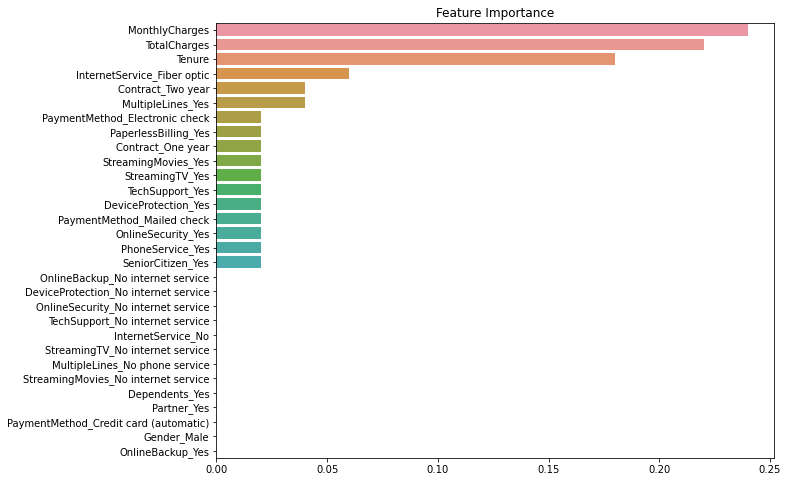

MonthlyCharges                    0.24
TotalCharges                      0.22
Tenure                            0.18
InternetService_Fiber optic       0.06
Contract_Two year                 0.04
MultipleLines_Yes                 0.04
PaymentMethod_Electronic check    0.02
PaperlessBilling_Yes              0.02
Contract_One year                 0.02
StreamingMovies_Yes               0.02
dtype: float64

In [57]:
plt.figure(figsize=(10,8))
feature_importance = pd.Series(ada_model.feature_importances_,
                        index=features.columns).sort_values(ascending=False)

sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title("Feature Importance")
plt.show()

feature_importance[:10]

# 6. Clustering Analysis

### Scaling dataset using Standard scaling

In [58]:
#Set Standard Scaler
stdScaler = StandardScaler()

#Applying scaling onto features 
scaled_df = stdScaler.fit_transform(df)

#Create Features DataFrame again to recover columns names
scaled_df = pd.DataFrame(scaled_df, 
                                  index=df.index, 
                                  columns=df.columns)
scaled_df = scaled_df.reset_index(drop=True)

#Checking dataset
print("\nScaled dataset Shape: ", scaled_df.shape)
print("\nScaled dataset Head: ")
display(scaled_df.head()) 


Scaled dataset Shape:  (7043, 31)

Scaled dataset Head: 


,Tenure,MonthlyCharges,TotalCharges,Churn,Gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.277445,-1.160323,-0.992611,-0.601023,-1.009559,-0.439916,1.034530,-0.654012,-3.054010,3.054010,...,-0.525927,-0.790132,-0.525927,-0.79607,-0.514249,-0.562975,0.829798,-0.525047,1.406418,-0.544807
1,0.066327,-0.259629,-0.172165,-0.601023,0.990532,-0.439916,-0.966622,-0.654012,0.327438,-0.327438,...,-0.525927,-0.790132,-0.525927,-0.79607,1.944582,-0.562975,-1.205113,-0.525047,-0.711026,1.835513
2,-1.236724,-0.362660,-0.958066,1.663829,0.990532,-0.439916,-0.966622,-0.654012,0.327438,-0.327438,...,-0.525927,-0.790132,-0.525927,-0.79607,-0.514249,-0.562975,0.829798,-0.525047,-0.711026,1.835513
3,0.514251,-0.746535,-0.193672,-0.601023,0.990532,-0.439916,-0.966622,-0.654012,-3.054010,3.054010,...,-0.525927,-0.790132,-0.525927,-0.79607,1.944582,-0.562975,-1.205113,-0.525047,-0.711026,-0.544807
4,-1.236724,0.197365,-0.938874,1.663829,-1.009559,-0.439916,-0.966622,-0.654012,0.327438,-0.327438,...,-0.525927,-0.790132,-0.525927,-0.79607,-0.514249,-0.562975,0.829798,-0.525047,1.406418,-0.544807


### Performing Dimensionality Reduction using PCA (Principal Component Analysis)

PCA (Principal Component Analysis) extracts the main components of the dataset and reduce the number of dimensions used on the visual analysis that will be performed in the final steps.

In [59]:
#Applying PCA to reduce the dimensionality maintaning st least 0.7 of variance
pca_model = PCA(n_components = 0.7, random_state=102)
dim_reduced_array = pca_model.fit_transform(scaled_df)

#Get the resulting number of dimensions
dim_num = pca_model.n_components_

#Compute the cumulative var
var_exp_ratio = pca_model.explained_variance_ratio_
cum_var_exp_ratio = np.cumsum(var_exp_ratio)

print("Reduce number of dimensions: ", dim_num)
print("Cumulative Variance Ratio: ", cum_var_exp_ratio)

Reduce number of dimensions:  8
Cumulative Variance Ratio:  [0.32230568 0.44527832 0.5341246  0.58072718 0.62118781 0.66108892
 0.69799368 0.73028712]


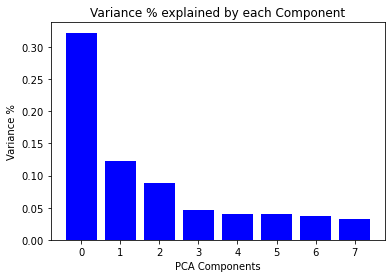

In [60]:
#Plot explained variance ratio per component
plt.bar(range(dim_num), var_exp_ratio, color='blue')
plt.xlabel('PCA Components')
plt.ylabel('Variance %')
plt.title('Variance % explained by each Component')
plt.xticks(range(dim_num))
plt.show()

The results show that reducing the number of dimension from 31 to 8, the cumulative variance explained still over 70%.

In [61]:
#Checking the total variance explained by the sum of the two first components.
cum_var_two_main_component = pca_model.explained_variance_ratio_[0:2].sum()
print("Variance Explained by the main Two Components: ", cum_var_two_main_component)

Variance Explained by the main Two Components:  0.44527831695647346


Based on the bar graph, we conclude that the first component alone explains about 33 % of the variance in the dataset. Summing the first two most significant components, the total variance explained is 44.5 %.

### Determining the best k number of Clusters

In the next steps, it will be applied methods Elbow and Silhouette to determine the most appropriate "k" number of clusters to use to run the Clustering models.

In [62]:
#Create a dataframe to hold the results
best_k_results_df = pd.DataFrame(
    columns=["Method", 
             "Best k Number"])

#Set "Number of selected features" column as int
best_k_results_df["Best k Number"] = best_k_results_df["Best k Number"].astype('int64')

Compute the best k number using Elbow method

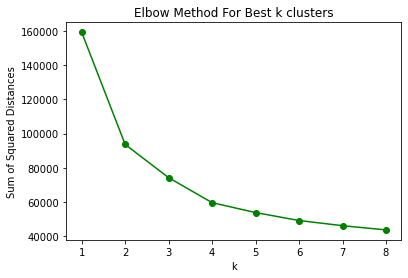

In [63]:
#Compute KMeans using several k, "k-means++" method and 5 seeds to initialize. Then, check the performance 
wcss = [] #create an empty array to hold results
for n in range(1, 9):
    kmeans = KMeans(init="k-means++", n_clusters=n, random_state=102, n_init=5)
    kmeans.fit(dim_reduced_array)
    #Get the "inertia" (indicator of how good is the clustering results)
    wcss.append(kmeans.inertia_)
    
# Plot WCSS curve
plt.plot(range(1,9), wcss, '-go')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Best k clusters')
plt.show()

After computed the WSS Elbow curve, the function KneeLocator will be used to identify the best number k.

In [64]:
#Get the best k from the curve shape using Knee
best_k_Kmeans = KneeLocator(range(1,9), wcss, curve="convex", direction="decreasing").elbow

#Show results
print("Best number of clusters using WSS Elbow curve analysis: ", best_k_Kmeans)

Best number of clusters using WSS Elbow curve analysis:  3


In [65]:
#Set method name
method_name = "WSS Elbow"

#Add result to feature_selection_results_df
item = {"Method": method_name,
        "Best k Number": best_k_Kmeans
       }
best_k_results_df = best_k_results_df.append(item, ignore_index=True)

#Show results
pd.set_option('display.max_colwidth', None)
display(best_k_results_df)

,Method,Best k Number
0,WSS Elbow,3


Compute the best k number using Silhouette method

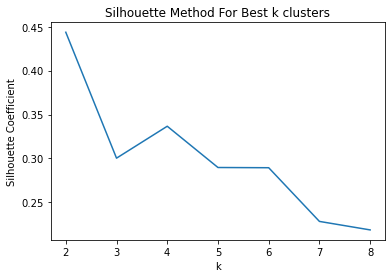

In [66]:
#Compute KMeans using several k, "k-means++" method and 5 seeds to initialize. Then, check the performance 
silhouette_coefficients = []#create an empty array to hold results

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=102, n_init=5)
    kmeans.fit(dim_reduced_array)
    #Compute the silhoute score using a simple size of 10k rows to reduce processing time
    score = silhouette_score(X=dim_reduced_array, labels=kmeans.labels_, metric='euclidean', sample_size=5000)
    silhouette_coefficients.append(score)
    
#Plot Silhouette Score
plt.plot(range(2, 9), silhouette_coefficients)
plt.xticks(range(2, 9))
plt.xlabel("k")
plt.ylabel("Silhouette Coefficient")
plt.title('Silhouette Method For Best k clusters')
plt.show() 

In [67]:
#Set method name
method_name = "Silhoutte Score"

#Add result to feature_selection_results_df
item = {"Method": method_name,
        "Best k Number": 2
       }
best_k_results_df = best_k_results_df.append(item, ignore_index=True)

#Show results
pd.set_option('display.max_colwidth', None)
display(best_k_results_df)

,Method,Best k Number
0,WSS Elbow,3
1,Silhoutte Score,2


Conclusion

For the next steps, the best k number used will be k = 3. 

### Running Clustering using the best k number of Clusters and dataset with 8 Dimensions

In [68]:
#Set best k number of clusters
best_k_selected = 3
#Set KMeans object using the best k number of clusters defined before
kmeans_model = KMeans(n_clusters = best_k_selected, random_state=102, max_iter=500, init="k-means++")

#Applying Clustering model using the dim reduced dataset
clusters_result = kmeans_model.fit_predict(dim_reduced_array)

#Show clusters
print(clusters_result)

[2 2 2 ... 2 2 1]


### Evaluating Clustering results

In [69]:
#Creating a new dataframe including the obtained clusters labels and the reduced dataset

#Recreate dataframe using the dim reduced array 
cluster_dim_reduced_df_cols = []
for i in range(dim_reduced_array.shape[1]):
    cluster_dim_reduced_df_cols.append("Component " + str(i))
cluster_dim_reduced_df = pd.DataFrame(dim_reduced_array,
                                     columns=cluster_dim_reduced_df_cols)
#Adding resulting clusters
cluster_dim_reduced_df["Cluster"] = kmeans_model.labels_

#Checking dataset
print("\nDim Reduced dataset with Clusters - Shape: ", cluster_dim_reduced_df.shape)
print("\nDim Reduced dataset with Clusters - Head: ")
display(cluster_dim_reduced_df.head(100)) 


Dim Reduced dataset with Clusters - Shape:  (7043, 9)

Dim Reduced dataset with Clusters - Head: 


,Component 0,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Cluster
0,-0.408789,-2.589901,3.883090,2.109335,-0.685689,0.616427,0.505218,-1.095875,2
1,-0.162253,-0.423133,1.450827,-2.990658,1.500768,0.663639,-0.946361,1.048801,2
2,-0.279072,-2.338064,0.885365,-2.292301,-0.211235,-0.892123,-0.533257,0.927169,2
3,-0.847208,-0.210342,5.121725,0.045712,2.033087,0.716487,-0.427333,0.934566,2
4,-0.748964,-3.577631,-1.006565,-0.037928,-0.562435,-0.417099,0.457056,-1.042342,2
5,-2.378879,-2.034011,-2.002029,1.065885,-0.040437,-0.125383,-0.950448,-1.046601,2
6,-1.606738,-0.034638,-0.865968,-0.615140,-0.063532,-0.326364,2.078876,0.974180,2
7,0.410680,-2.320901,4.968303,-0.435331,0.188882,-0.733076,-0.858033,-0.930212,2
8,-2.986964,-0.361697,-1.757608,1.076956,-0.688615,0.410934,-1.001106,-1.078974,1
9,-0.567755,0.779290,1.326293,-2.267093,0.579026,1.485650,0.804818,0.924326,1


Next, we will create a scatter plot to visualize the cluster groups. To see that in two dimensions, only the first two main components of will be used.

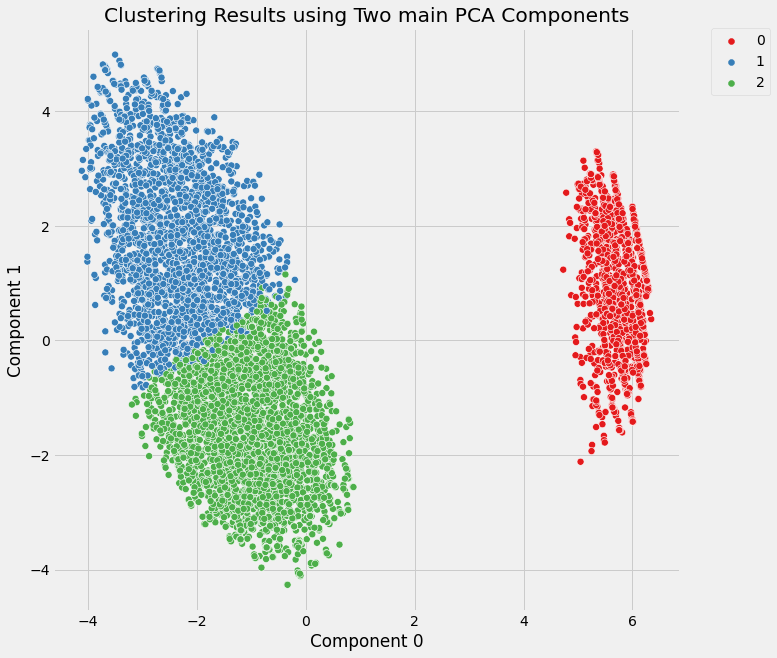

In [70]:
#Set figure
plt.style.use("fivethirtyeight")
plt.figure(figsize=(10, 10))

#Define the scatter plot
scat = sns.scatterplot(
    x="Component 0",
    y="Component 1",
    s=50,
    data=cluster_dim_reduced_df,
    hue="Cluster",
    palette="Set1",
)
#Set Title   
scat.set_title(
    "Clustering Results using Two main PCA Components"
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

This scatter plot shows that considering the two most important data components, the KMeans clustering technique appears to separate the data into 3 groups very clearly.

### Adding cluster labels to the Dataframe.

In [71]:
#Adding obtained clusters labels to the Cleaned dataset

cluster_df = raw_df.copy()
cluster_df["Cluster"] = kmeans_model.labels_

#Checking dataset
print("\nDataset with Clusters - Shape: ", cluster_df.shape)
print("\nDataset with Clusters - Head: ")
display(cluster_df.head()) 


Dataset with Clusters - Shape:  (7043, 21)

Dataset with Clusters - Head: 


,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Cluster
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,2
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,2
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,2
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,2
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,2


In [72]:
cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   Tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Plotting histograms showing the distribution per Cluster. These graphs will be used to interpret the results and identify the characteristics of each cluster.

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

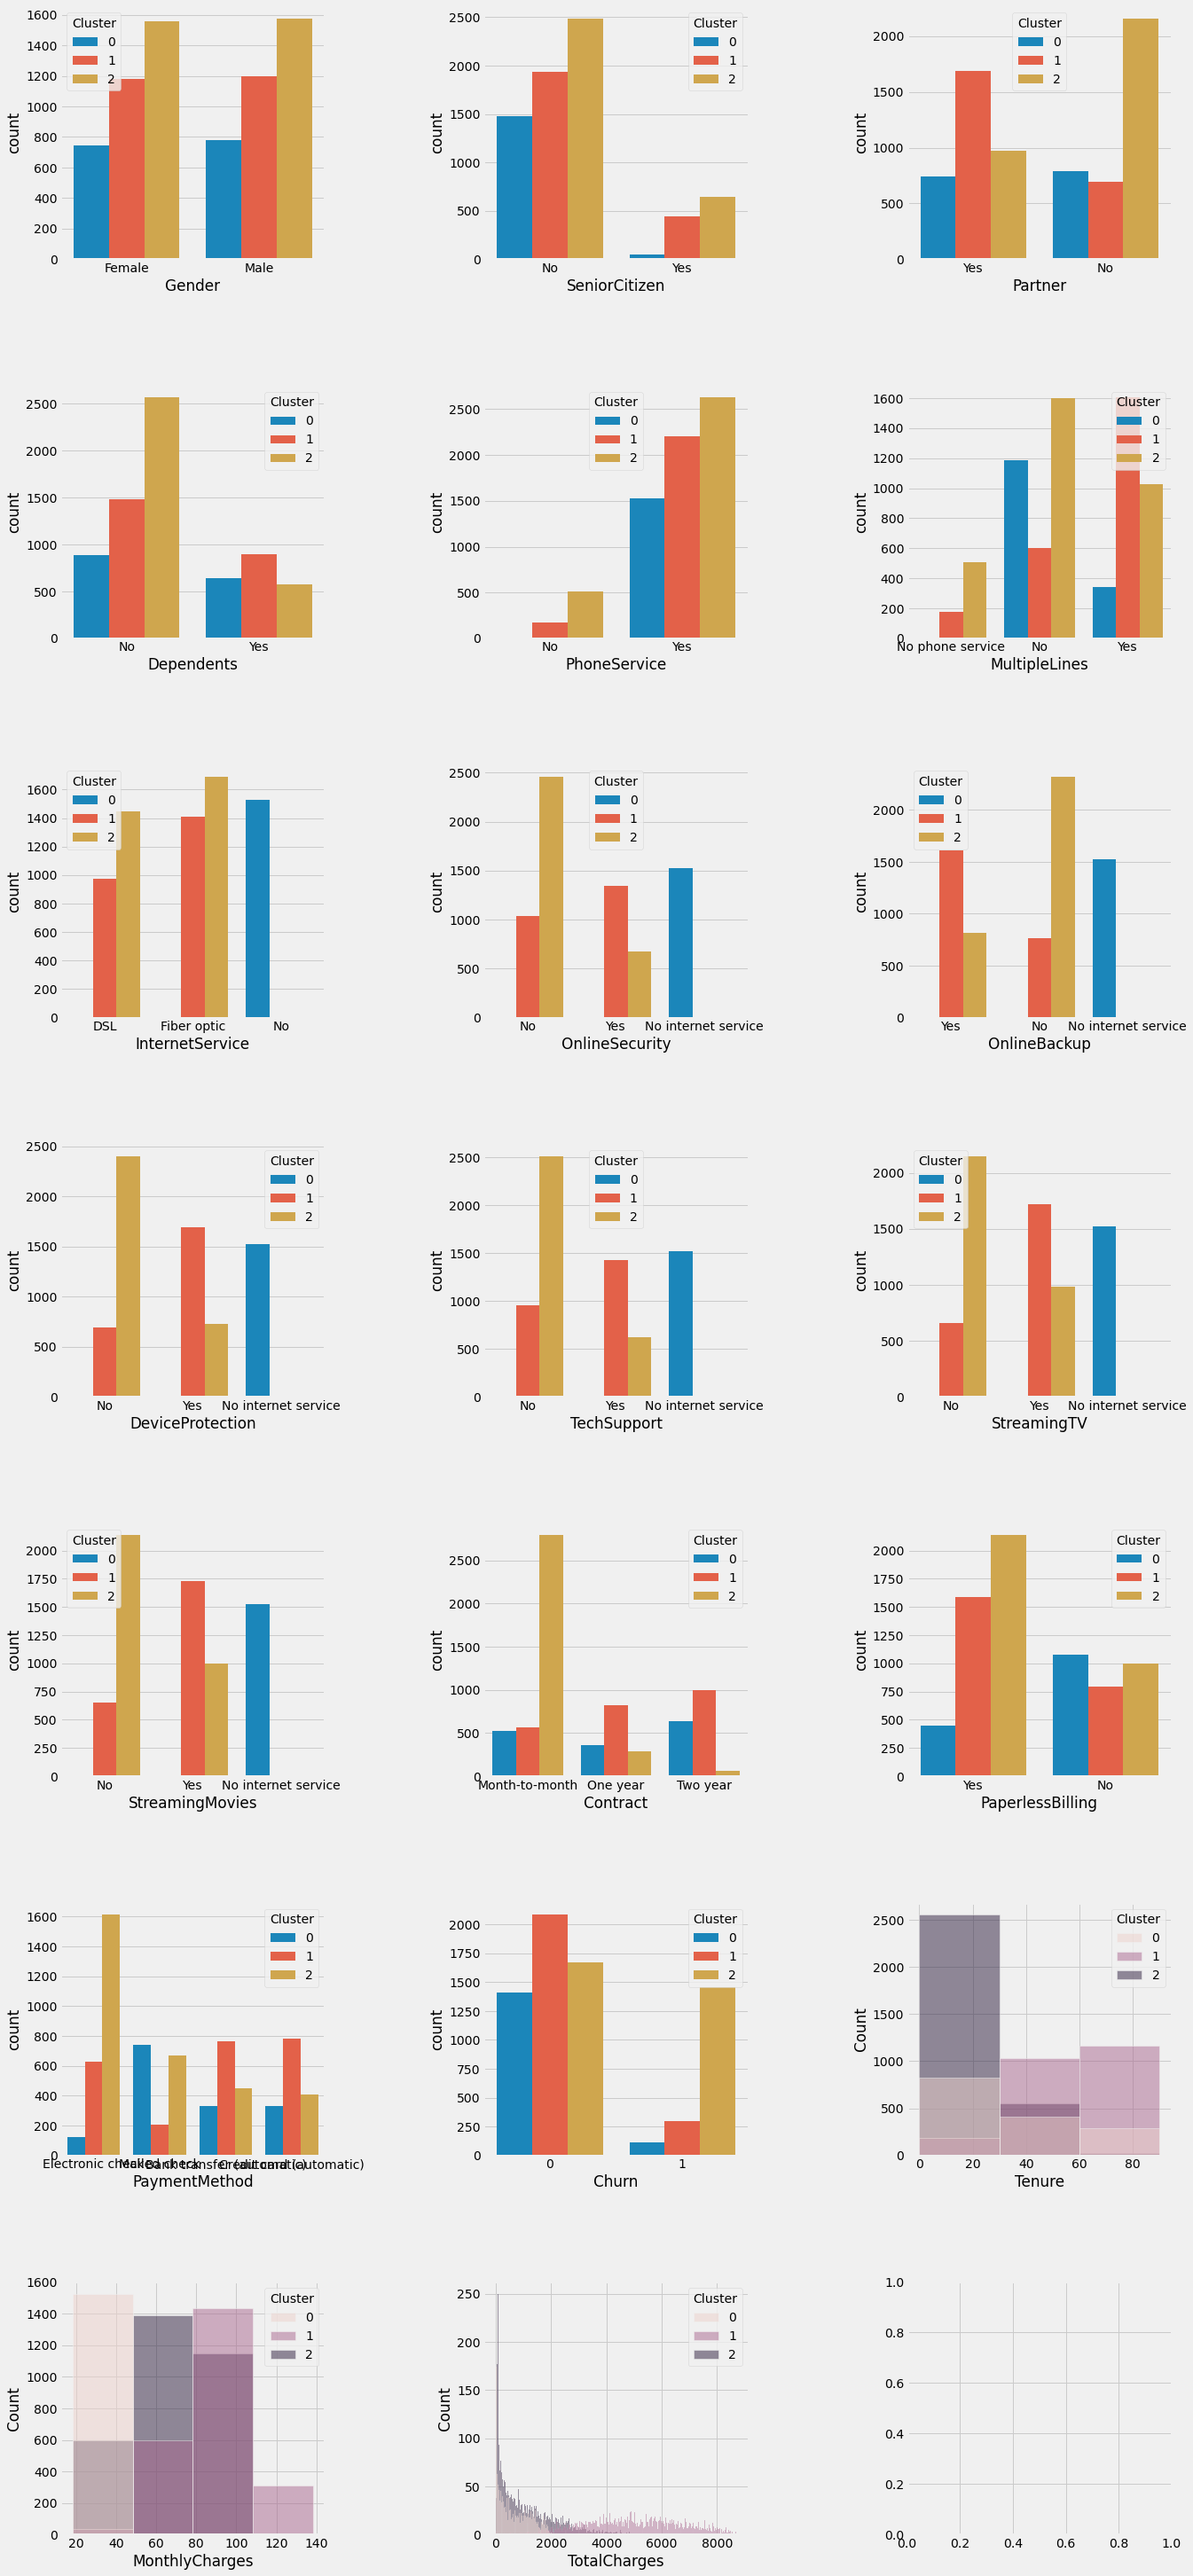

In [73]:
#Define plots organization
fig, axs = plt.subplots(7,3)
plt.subplots_adjust(left=0.1, right=3.0, bottom=0.1, top=10.0, wspace=0.6, hspace=0.5)

#Plot histograms
sns.countplot(x="Gender", data=cluster_df, ax=axs[0,0], hue="Cluster")
sns.countplot(x="SeniorCitizen", data=cluster_df, ax=axs[0,1], hue="Cluster")
sns.countplot(x="Partner", data=cluster_df, ax=axs[0,2], hue="Cluster")

sns.countplot(x="Dependents", data=cluster_df, ax=axs[1,0], hue="Cluster")
sns.countplot(x="PhoneService", data=cluster_df, ax=axs[1,1], hue="Cluster")
sns.countplot(x="MultipleLines", data=cluster_df, ax=axs[1,2], hue="Cluster")

sns.countplot(x="InternetService", data=cluster_df, ax=axs[2,0], hue="Cluster")
sns.countplot(x="OnlineSecurity", data=cluster_df, ax=axs[2,1], hue="Cluster")
sns.countplot(x="OnlineBackup", data=cluster_df, ax=axs[2,2], hue="Cluster")

sns.countplot(x="DeviceProtection", data=cluster_df, ax=axs[3,0], hue="Cluster")
sns.countplot(x="TechSupport", data=cluster_df, ax=axs[3,1], hue="Cluster")
sns.countplot(x="StreamingTV", data=cluster_df, ax=axs[3,2], hue="Cluster")

sns.countplot(x="StreamingMovies", data=cluster_df, ax=axs[4,0], hue="Cluster")
sns.countplot(x="Contract", data=cluster_df, ax=axs[4,1], hue="Cluster")
sns.countplot(x="PaperlessBilling", data=cluster_df, ax=axs[4,2], hue="Cluster")

sns.countplot(x="PaymentMethod", data=cluster_df, ax=axs[5,0], hue="Cluster")
sns.countplot(x="Churn", data=cluster_df, ax=axs[5,1], hue="Cluster")

sns.histplot(x="Tenure", binwidth=30, data=cluster_df, ax=axs[5,2], hue="Cluster")
sns.histplot(x="MonthlyCharges", binwidth=30, data=cluster_df, ax=axs[6,0], hue="Cluster")
sns.histplot(x="TotalCharges", binwidth=30, data=cluster_df, ax=axs[6,1], hue="Cluster")

Computing the description of the statistics of the numeric and categorical attributes. The statistics information will be also used to interpret the results and identify the characteristics of each cluster.

In [74]:
#Checking numeric statistics based on the cluster groups
pd.set_option('display.max_rows', None)
display(cluster_df.groupby("Cluster").describe().reset_index().T)

0            1            2
Cluster                  0.000000     1.000000     2.000000
Tenure         count  1526.000000  2382.000000  3135.000000
               mean     30.547182    55.077666    16.006380
               std      24.356507    15.393626    15.007293
               min       0.000000     0.000000     0.000000
               25%       8.000000    45.000000     3.000000
               50%      25.000000    59.000000    11.000000
               75%      52.750000    68.000000    25.000000
               max      72.000000    72.000000    71.000000
MonthlyCharges count  1526.000000  2382.000000  3135.000000
               mean     21.079194    88.882914    67.697177
               std       2.164221    17.851175    20.250712
               min      18.250000    35.700000    23.450000
               25%      19.700000    75.912500    50.550000
               50%      20.150000    91.950000    70.400000
               75%      20.900000   104.050000    84.350000
               max      26.900000   118.750000   112.950000
TotalCharges   count  1526.000000  2382.000000  3135.000000
               mean    662.604784  4907.983900  1069.925407
               std     555.627705  1763.651881  1022.122178
               min       0.000000     0.000000     0.000000
               25%     157.825000  3566.625000   219.325000
               50%     519.200000  4893.300000   765.150000
               75%    1108.650000  6252.975000  1645.000000
               max    2006.950000  8684.800000  5283.950000
Churn          count  1526.000000  2382.000000  3135.000000
               mean      0.074050     0.124265     0.465710
               std       0.261938     0.329953     0.498902
               min       0.000000     0.000000     0.000000
               25%       0.000000     0.000000     0.000000
               50%       0.000000     0.000000     0.000000
               75%       0.000000     0.000000     1.000000
               max       1.000000     1.000000     1.000000

In [75]:
#Checking categorical statistics based on the cluster groups
pd.set_option('display.max_rows', None)
display(cluster_df.groupby("Cluster").describe(include=[object]).reset_index().T)

0                        1  \
Cluster                                    0                        1   
Gender           count                  1526                     2382   
                 unique                    2                        2   
                 top                    Male                     Male   
                 freq                    779                     1199   
SeniorCitizen    count                  1526                     2382   
                 unique                    2                        2   
                 top                      No                       No   
                 freq                   1474                     1938   
Partner          count                  1526                     2382   
                 unique                    2                        2   
                 top                      No                      Yes   
                 freq                    788                     1689   
Dependents       count                  1526                     2382   
                 unique                    2                        2   
                 top                      No                       No   
                 freq                    883                     1486   
PhoneService     count                  1526                     2382   
                 unique                    1                        2   
                 top                     Yes                      Yes   
                 freq                   1526                     2208   
MultipleLines    count                  1526                     2382   
                 unique                    2                        3   
                 top                      No                      Yes   
                 freq                   1184                     1604   
InternetService  count                  1526                     2382   
                 unique                    1                        2   
                 top                      No              Fiber optic   
                 freq                   1526                     1407   
OnlineSecurity   count                  1526                     2382   
                 unique                    1                        2   
                 top     No internet service                      Yes   
                 freq                   1526                     1341   
OnlineBackup     count                  1526                     2382   
                 unique                    1                        2   
                 top     No internet service                      Yes   
                 freq                   1526                     1613   
DeviceProtection count                  1526                     2382   
                 unique                    1                        2   
                 top     No internet service                      Yes   
                 freq                   1526                     1691   
TechSupport      count                  1526                     2382   
                 unique                    1                        2   
                 top     No internet service                      Yes   
                 freq                   1526                     1425   
StreamingTV      count                  1526                     2382   
                 unique                    1                        2   
                 top     No internet service                      Yes   
                 freq                   1526                     1722   
StreamingMovies  count                  1526                     2382   
                 unique                    1                        2   
                 top     No internet service                      Yes   
                 freq                   1526                     1733   
Contract         count                  1526                     2382   
                 unique     

### Conclusion about the clustering results

Based on the analysis of the attributes distributions and statistics details per cluster, we can conclude that:

#### Main characteristics of Cluster 0:

- The smallest cluster: 1526 customers
- The most important feature: all customers do not have internet service provided by telco operator.
- The median tenure time is 25 month ( 2 years)
- The smallest median and average monthly charges
- The smallest median and average total charges
- Basically because they do not use internet from the provider they do not have all additional services (online security, backup, device protection, etc)
- Most of the customers from this cluster group do not churn the telco provider

#### Conclusions about cluster 0 group and main recommendations:
- It is a perspective group of customers. Even they do not pay the highest charges but stay with company for a quite long time
- The telco provider can take a look how to engage these customers into using the internet from the company and therefore offer them all range of the additional services. 

#### Main characteristics of Cluster 1:

- The cluster consists of 2382 customers
- The largest median and average tenure time (59,55 months or 5 years)
- The highest median and average monthly charges
- The highest median and average total charges (probably, because they stay with the telco company the longest)
- Half of the customers are using 2-year contracts, while the least number of customers are using month-to-month contract
- More than a half of customers are using fiber optic internet
- Most of customers are senior
- More than a half of customers use various additional services (online security, backup, device protection, etc)
- Most of the customers from this cluster group do not churn the telco provider

#### Conclusions about cluster 1 group and main recommendations:
- It is the most perspective group of customers. they pay the highest charges and stay with company for a long time.
- The telco provider  should always offer interesting promotions and additional services of high quality for this group of customers as a part of retention campaign. 

#### Main characteristics of Cluster 2:

- The largest cluster: 3135 customers
- The largest median and average tenure time (59,55 months or 5 years)
- The  median and average monthly charges larger than in cluster 0 but less than in cluster 1
- The  median and average total charges larger than in cluster 0 but less than in cluster 1
- Most the customers are using month-to-month contracts
- More than a half of customers are using fiber optic internet
- Most of customers are not senior, do not have partner and/or dependents
- The customers are using DSL or fiber optic internet
- More of customers do not use various additional services (online security, backup, device protection, etc)
- More than a half of the customers from this cluster group churn the telco provider

#### Conclusions about cluster 2 group and main recommendations:
- This is the most hard to retain group of customers. They can easily churn the telco provider as they have month-to-month contract, no family connectivity plans, they often do not use additional services. The reason why they can churn is probably the price, or bad price/services quality ratio.
- The telco provider  should  try to engage this group in more long tenures by observing the market situation and prices from competitors, offering the most appealing deals to the group and additional services or bonuses. The quality of services provided also should be the priority. 